1. Kiran HD (1NT22EC190)
I HAVE dnone the 2nd task which was offered for ML domain
Problem Statement: Spotify Song Success Prediction
At first I have done the data pre processing
First I have imported all the libraries as shown in the code then loaded the data set
Data Loading and Initial Exploration


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Used null to find out if there were any missing values
There were none so I proceeded further


In [5]:
ki=pd.read_csv("spotify_top_songs_audio_features.csv")
print(ki.shape)
print(ki.isnull().sum())

(6513, 19)
id                  0
artist_names        0
track_name          0
source              0
key                 0
mode                0
time_signature      0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
loudness            0
tempo               0
duration_ms         0
weeks_on_chart      0
streams             0
dtype: int64


Data Overview
used data.head() and data.describe () to get an overview of the entire data

In [6]:
ki.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09


In [7]:
ki.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


Data Preprocessing
to encode categorical variables I have used one hot encoding. to convert them into a numerical format suitable for machine learning algorithms.

I have standardized the numerical features using StandardScaler to ensure that they have a mean of 0 and a standard deviation of 1


In [8]:
from sklearn.preprocessing import StandardScaler
if 'artist_names' in ki.columns and 'track_name' in ki.columns and 'source' in ki.columns :
    ki = pd.get_dummies(ki, columns=['artist_names','track_name', 'source',], drop_first=True)
scaler = StandardScaler()
n_f = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'duration_ms', 'weeks_on_chart']

ki_scaled= scaler.fit_transform(ki[n_f])
ki_scaled = pd.DataFrame(ki_scaled)
ki_scaled.columns = n_f
ki_scaled

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart
0,0.467421,-0.057781,-0.511608,-0.432091,-0.165928,-0.687957,0.139166,0.126844,-0.039242,-0.286115,0.140563
1,-2.318656,0.718919,5.387041,-0.631465,-0.165928,1.520039,-0.244123,0.029444,2.347050,-0.180639,-0.482303
2,-2.325709,1.665521,-0.416398,-0.962353,-0.165928,-0.584366,-1.129651,0.441917,0.881074,0.414798,4.625203
3,-0.435409,-0.069917,3.800198,0.205254,-0.165928,0.969489,0.760357,-0.428773,1.556878,1.672689,-0.482303
4,0.037166,0.876686,-0.607700,-0.819809,-0.165928,-0.758224,0.861686,0.609115,-0.853450,-0.184156,0.680381
...,...,...,...,...,...,...,...,...,...,...,...
6508,-0.470676,0.864550,0.115195,-0.695608,-0.165928,-0.182320,-0.173633,-0.040748,1.287923,0.114467,-0.523828
6509,0.601435,-1.963122,-0.371437,2.456387,-0.165928,-0.544524,1.200919,-2.250991,-1.344104,0.169533,-0.482303
6510,1.708813,0.567220,1.340591,-0.752806,-0.165928,-0.486571,1.566584,0.088988,-0.785591,0.693134,-0.523828
6511,0.319301,-0.646374,1.675591,0.188911,-0.165561,1.534527,-1.032727,-0.893299,1.764739,0.168191,-0.523828


Checking for outliers
I am using box plot to find out the outliers so that we can clean then the data set.
I have visualized the distributions of the scaled features using box plots which allows to identify outliers.

Text(0.5, 1.0, 'Box plot with outliers')

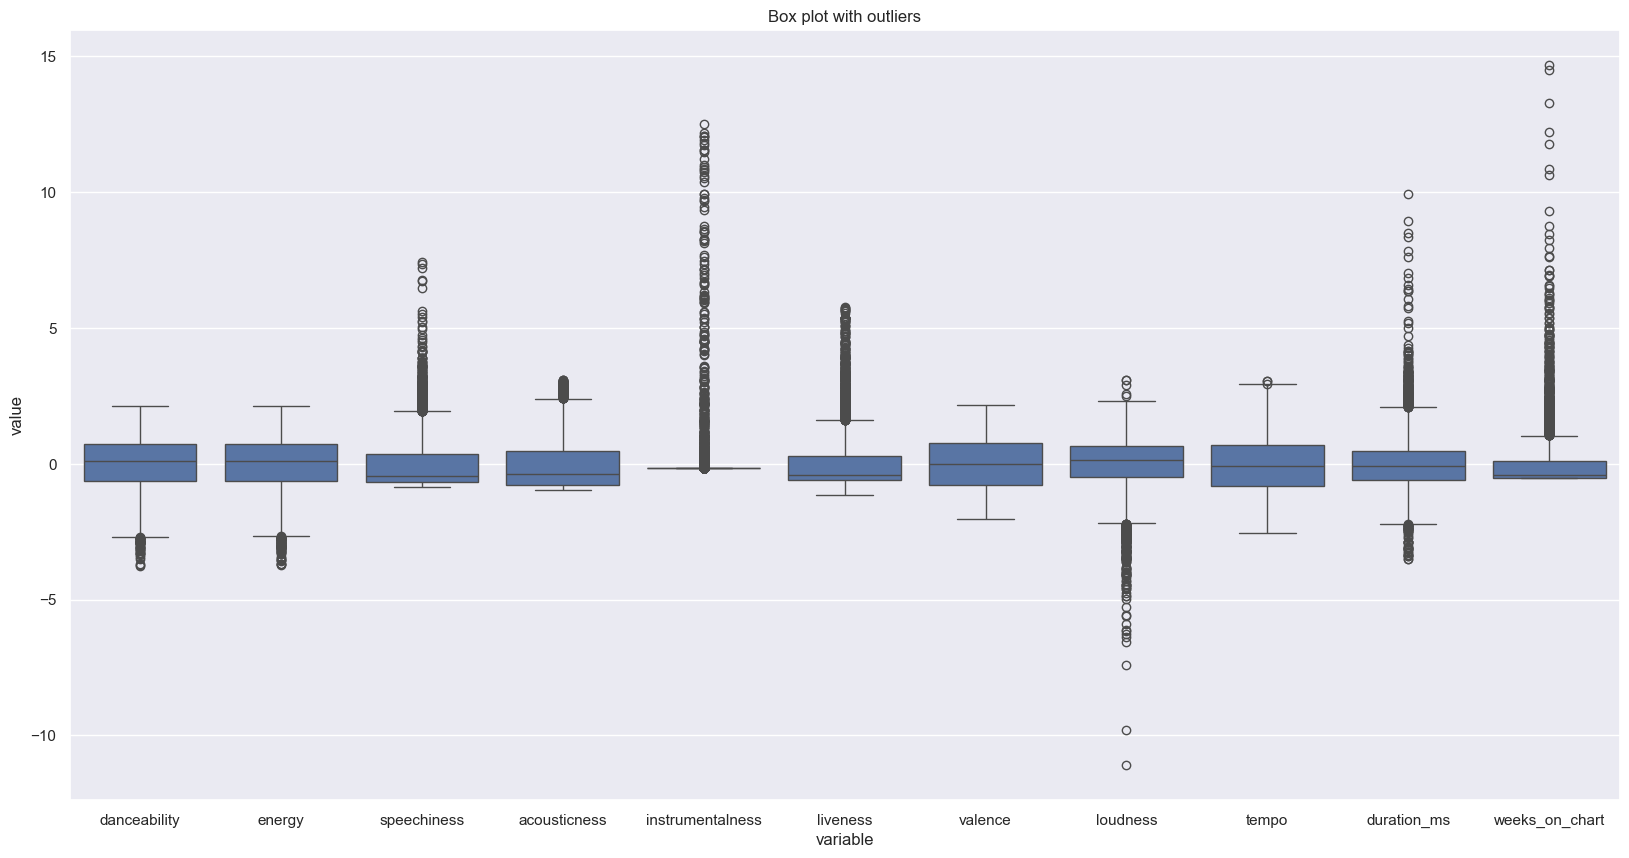

In [9]:
ki_melt=pd.melt(ki_scaled)
ki_melt
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x='variable', y='value', data=ki_melt)
plt.title('Box plot with outliers')

I have calculated z-scores and used the interquartile range to filter out outliers from dataset.

In [10]:
from scipy import stats 
z_scores = np.abs(stats.zscore(ki['instrumentalness'])) 
print(z_scores) 


0       0.165928
1       0.165928
2       0.165928
3       0.165928
4       0.165928
          ...   
6508    0.165928
6509    0.165928
6510    0.165928
6511    0.165561
6512    0.165928
Name: instrumentalness, Length: 6513, dtype: float64


In [11]:
ki_clean= ki_scaled
for x in ki_clean.columns:
  q1=ki_clean[x].quantile(0.25)
  q3=ki_clean[x].quantile(0.75)
  inq=q3-q1
  filter=(ki_clean[x] >= q1-1.5*inq) & (ki_clean[x] <= q3+1.5*inq)
  ki_clean[x] = ki_clean[x].loc[filter]
ki_clean.isna().sum()

danceability          47
energy                69
speechiness          417
acousticness         249
instrumentalness    1340
liveness             408
valence                0
loudness             205
tempo                  3
duration_ms          242
weeks_on_chart       576
dtype: int64

Text(0.5, 1.0, 'Box plot with outliers')

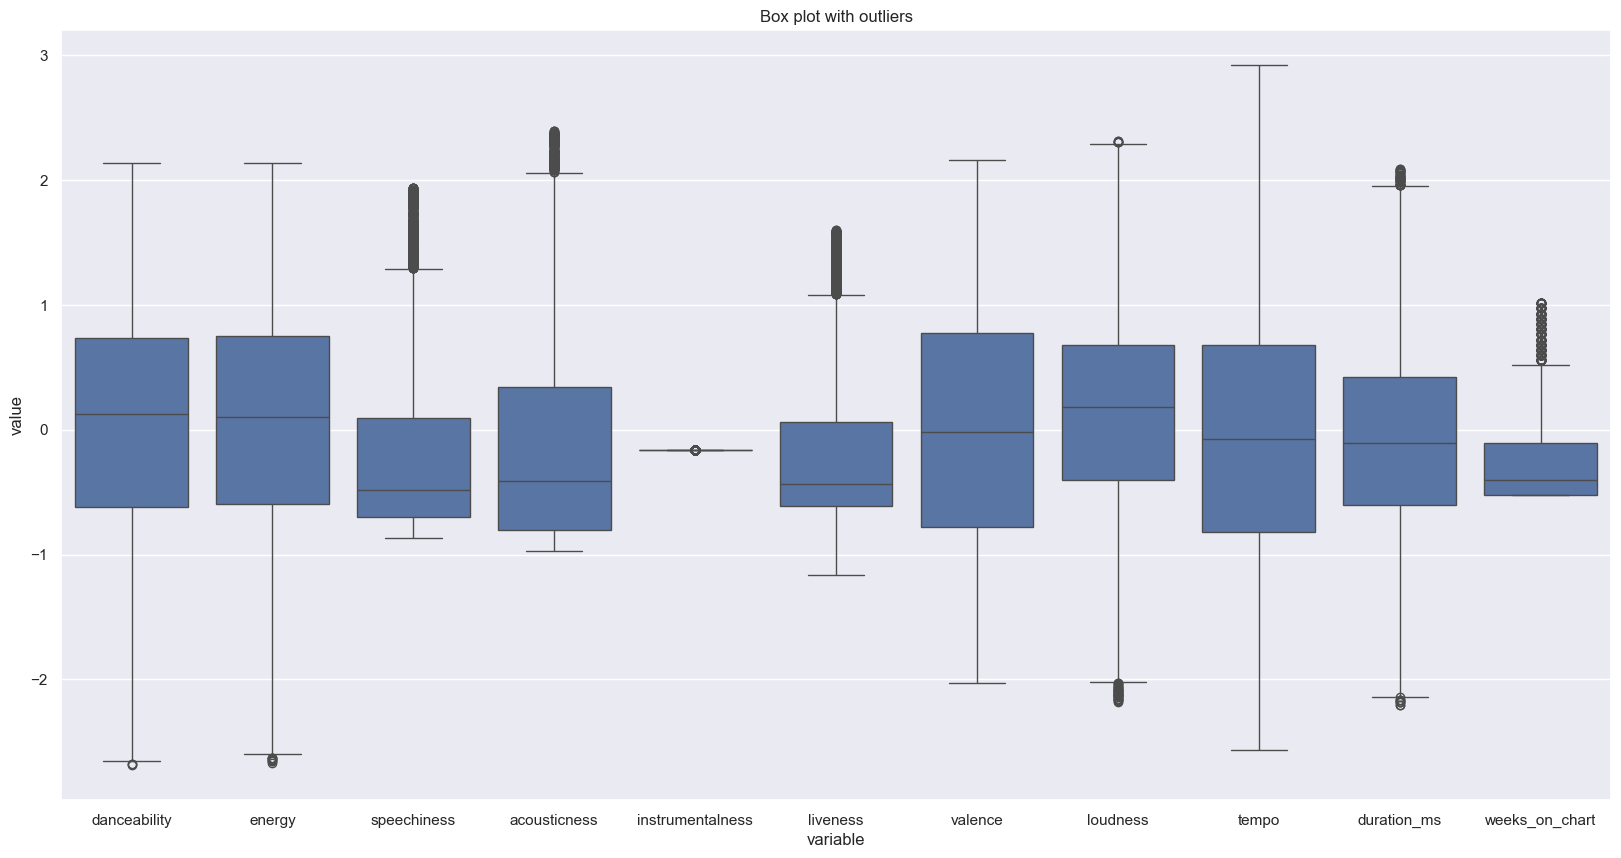

In [12]:
ki_melt=pd.melt(ki_clean)
ki_melt
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x='variable', y='value', data=ki_melt)
plt.title('Box plot with outliers')

After this I have made a correlation analysis and used a heat map to showcase the relationship bw the features so tht we can get an idea which are the features which affect on deciding wether the song is hit or not

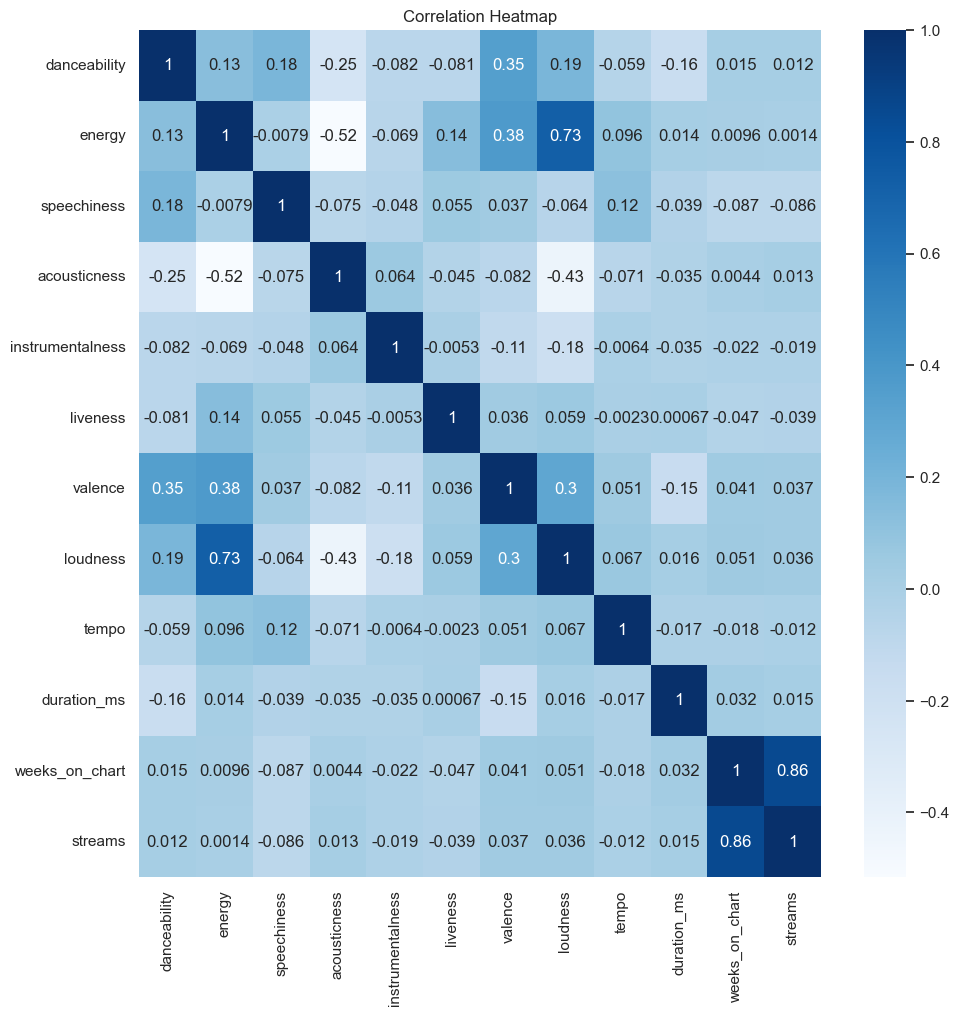

In [13]:
n_f = ki.select_dtypes(include=np.number)

fig, ax = plt.subplots(figsize=(11, 11))
ax = sns.heatmap(n_f.corr(), annot=True, cmap='Blues').set(title='Correlation Heatmap')
plt.show()

Next I have done basic plotting of histogram where I have showed how different feat8urees are related with each other

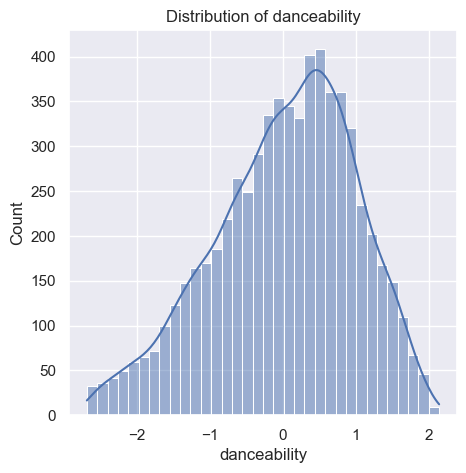

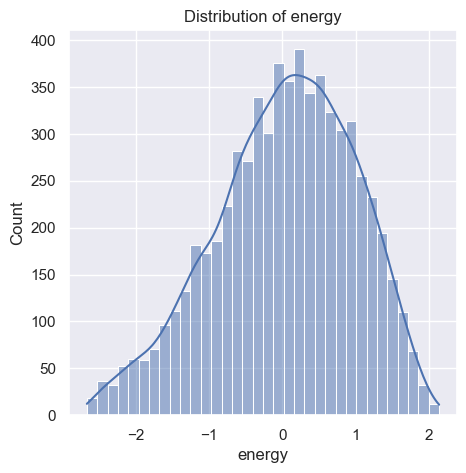

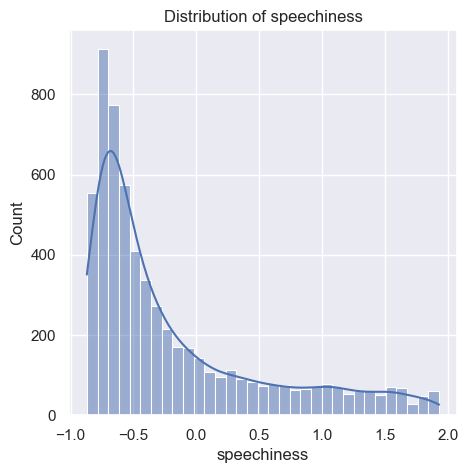

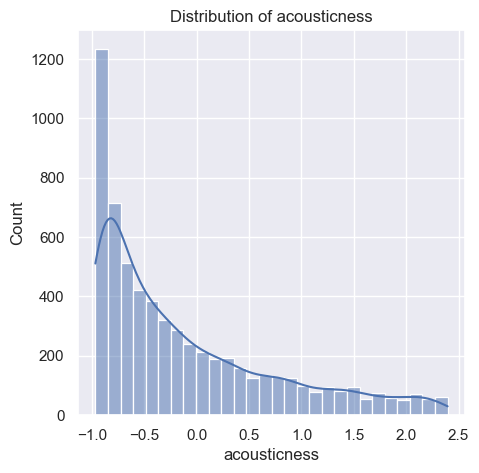

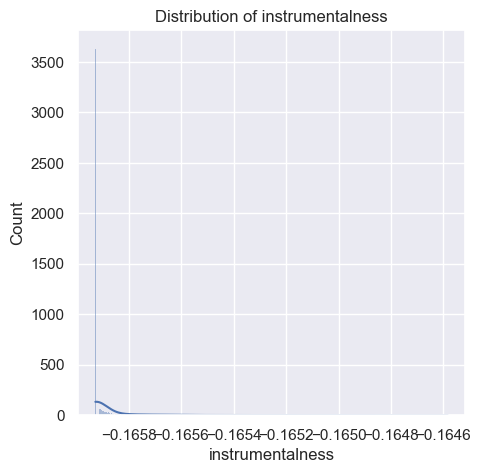

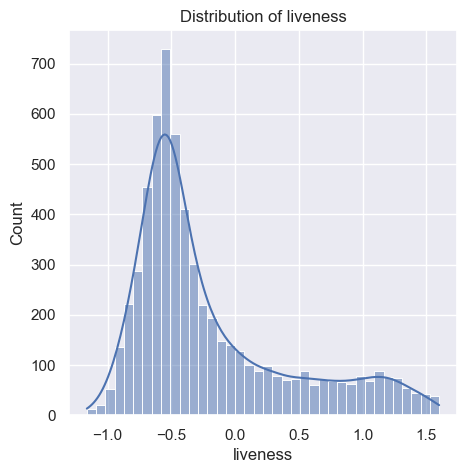

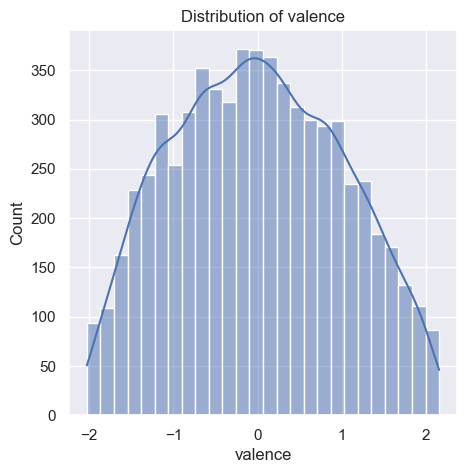

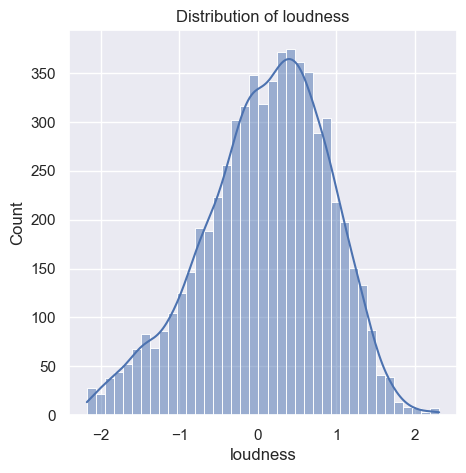

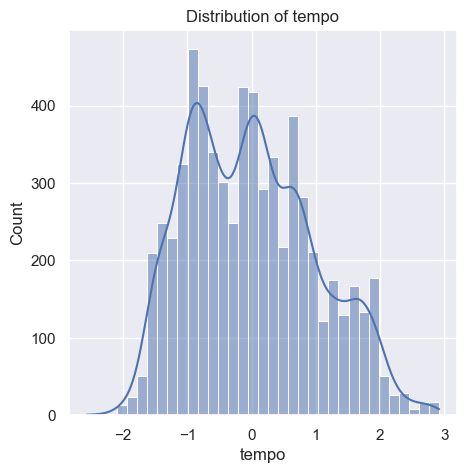

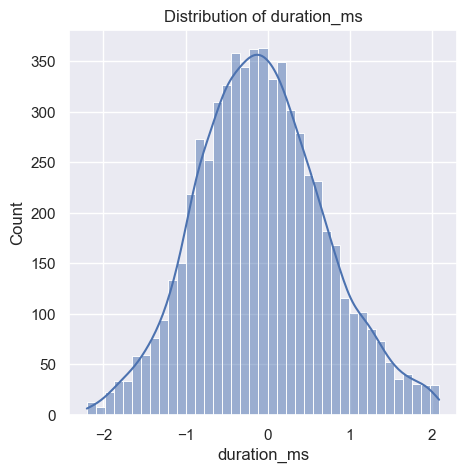

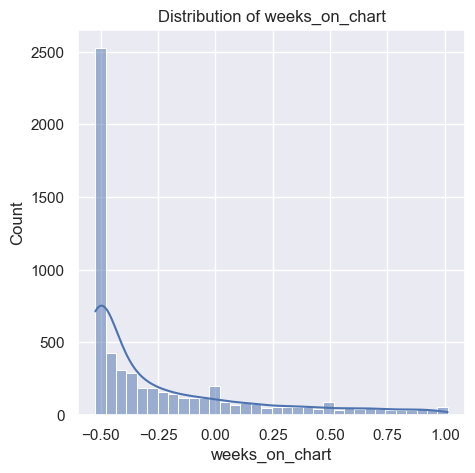

In [14]:
for x in ki_scaled.columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(ki_scaled[x], kde=True)
    plt.title(f'Distribution of {x}')
    plt.show()

Task 1
Hit Song Classification
Build a classification model that predicts whether a song will become a "Top Hit" based on its audio features. The target variable for this task could be a binary indicator (1 for hit, 0 for not a hit).


After this I have created a target variable hit which indicates whether a song is a hit based on its streams. I have taken a threshold value of 10000000
After tis count plot to visualize the distribution of the target variable, giving insights into the balance between hit and non-hit songs in your dataset.


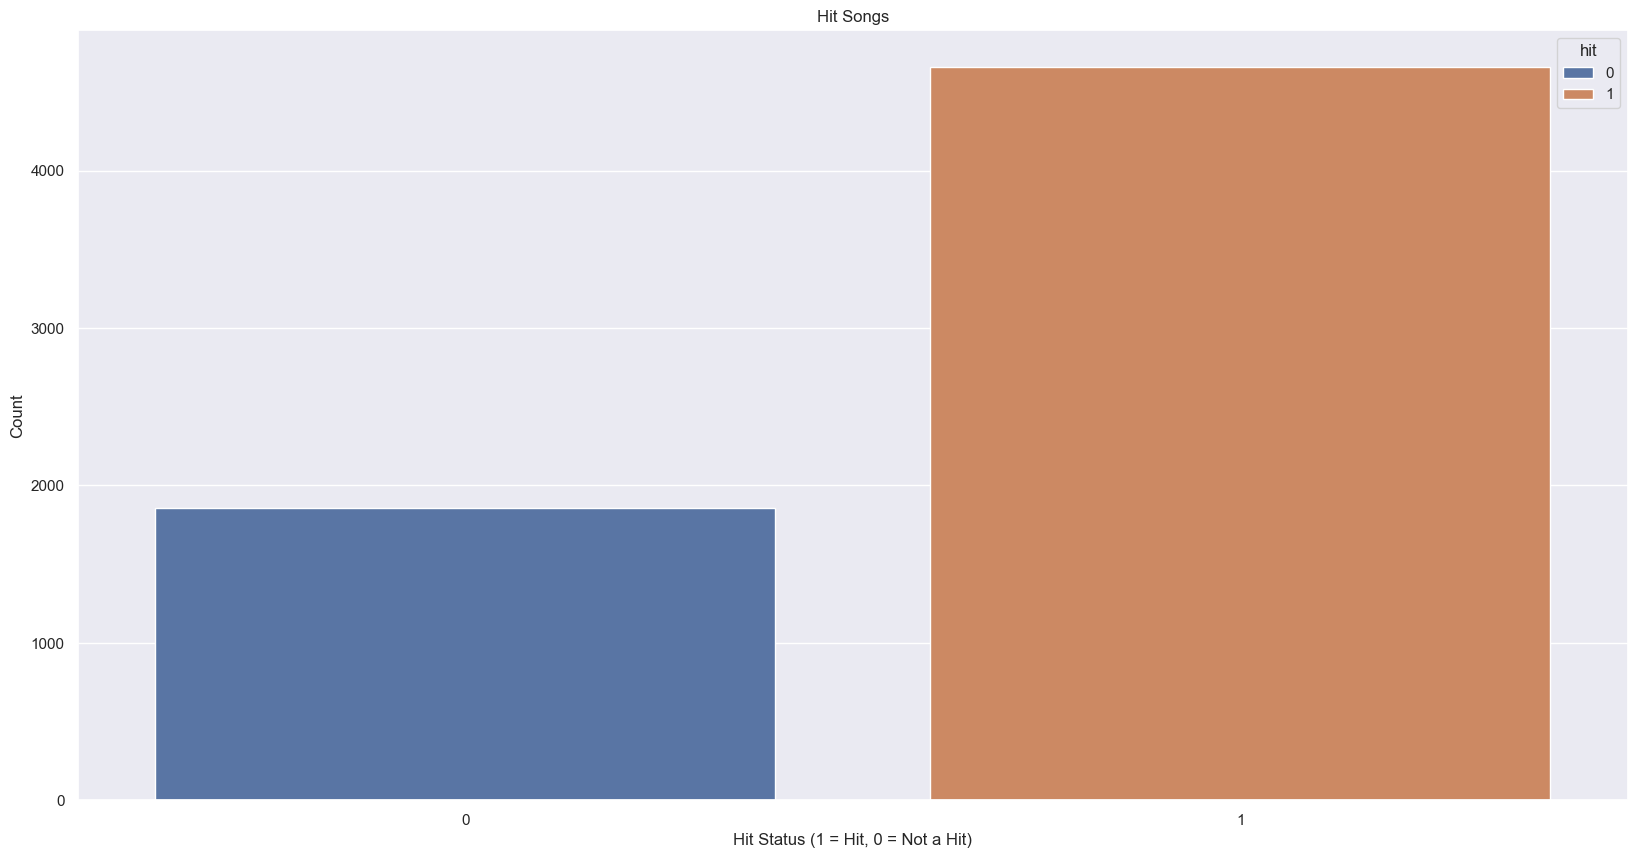

In [15]:
value = 10000000
ki['hit'] = (ki['streams'] > value).astype(int) 
sns.countplot(x='hit', data=ki, hue= 'hit') 
plt.title('Hit Songs')
plt.xlabel('Hit Status (1 = Hit, 0 = Not a Hit)')
plt.ylabel('Count')
plt.show()

I have separated the features (X) from the target variable (y), dropping the columns that were not needed for the prediction task.
After tht I have applied label encoding to any remaining categorical features in the dataset converting them into a numerical format.


In [16]:
X = ki.drop(['streams', 'hit'], axis=1)
y = ki['hit']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
for x in X.select_dtypes(include=['object']).columns:
    X[x] = le.fit_transform(X[x])
    print(x)
    print(le.classes_)
    print()

id
['000xQL6tZNLJzIrtIgxqSl' '003eoIwxETJujVWmNFMoZy'
 '003vvx7Niy0yvhvHt4a68B' ... '7zl7kehxesNEo2pYkKXTSe'
 '7zvfDihYiJ8RQ1nRcpKBF5' '7zxRMhXxJMQCeDDg0rKAVo']

key
['A' 'A#/Bb' 'B' 'C' 'C#/Db' 'D' 'D#/Eb' 'E' 'F' 'F#/Gb' 'G' 'G#/Ab']

mode
['Major' 'Minor']

time_signature
['1' '3 beats' '4 beats' '5 beats']



Training the model
 I have used random forest classifier for doing this task cuz it can handle both numerical data and categorical data logistic regression is good only for simple calc.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
classifier = RandomForestClassifier(n_estimators=500, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

Model evaluation
I have used a confusion matrix to evaluate the model's performance and calculated the ROC-AUC score to distinguish between hit and non-hit songs.
I have generated a classification report, providing detailed metrics such as precision, recall, and F1-score for both classes, which offers insights into the model’s performance. And  we get vthe following op.


In [18]:
from sklearn.metrics import confusion_matrix, roc_auc_score
y_pred = classifier.predict(X_test)
c_m = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", c_m)
roc= roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc:.2f}')

Confusion Matrix:
 [[308  63]
 [ 60 872]]
ROC-AUC Score: 0.93


After this I have generated a classification report, providing detailed metrics such as precision, recall, and F1-score to show the model performance.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       371
           1       0.93      0.94      0.93       932

    accuracy                           0.91      1303
   macro avg       0.88      0.88      0.88      1303
weighted avg       0.91      0.91      0.91      1303



Task 2: 
Stream Count Prediction
Build a regression model that predicts the number of streams a song will accumulate, based on its audio features and metadata. The target variable for this task is streams, which represents the total number of times a song has been streamed.


First I am importing random forest regressor , i am using this algorithm cuz I am very familiar to it and rfe regressor can capture the required relation bw the features

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = ki.drop(['streams', 'id', 'hit','duration_ms','loudness','instrumentalness','weeks_on_chart'], axis=1)
y = ki['streams']
le = LabelEncoder()
for x in X.select_dtypes(include=['object']).columns:
    X[x] = le.fit_transform(X[x])

I am taking streams as the target variable which shows number of times a song has been played.
I have used label encoder which assigns a unique integer to each unique category in these columns, converting them into a numerical format 
I have split the dataset into training and testing sets to evaluate the model’s performance 
test_size=0.2: 20% of the data is reserved for testing, while 80% is used for training.
random_state=42: Ensures that the split is reproducible, meaning the same random split will be generated every time the code is run.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=['number']).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [22]:
X.head()

,key,mode,time_signature,danceability,energy,speechiness,acousticness,liveness,valence,tempo,...,source_manuoficial,source_pgLang/Top Dawg Entertainment/Aftermath/Interscope Records,source_round2media - LaFamilia,source_sped up nightcore,source_t-low,source_wonda & oclody,source_world in red,source_©️ Ⓟ 2022 Sur Capital Records (por Tierra Agencia),"source_에이스토리, 모스트콘텐츠",source_피네이션
0,10,0,2,0.748,0.627,0.0639,0.13100,0.0852,0.524,120.963,...,False,False,False,False,False,False,False,False,False,False
1,4,1,2,0.353,0.755,0.7330,0.08220,0.3900,0.437,191.153,...,False,False,False,False,False,False,False,False,False,False
2,4,0,2,0.352,0.911,0.0747,0.00121,0.0995,0.236,148.033,...,False,False,False,False,False,False,False,False,False,False
3,0,0,2,0.620,0.625,0.5530,0.28700,0.3140,0.665,167.911,...,False,False,False,False,False,False,False,False,False,False
4,4,0,2,0.687,0.781,0.0530,0.03610,0.0755,0.688,97.014,...,False,False,False,False,False,False,False,False,False,False


After this I have calculated the rmse, mae and r2 score for evaluation of the model

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")